# Implement a KNN model to classify the animals in to categories

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Load Dataset

In [2]:
zoo = pd.read_csv('zoo.csv')

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


#### EDA on dataset

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
zoo.shape

(101, 18)

In [9]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [10]:
len(zoo.columns)

18

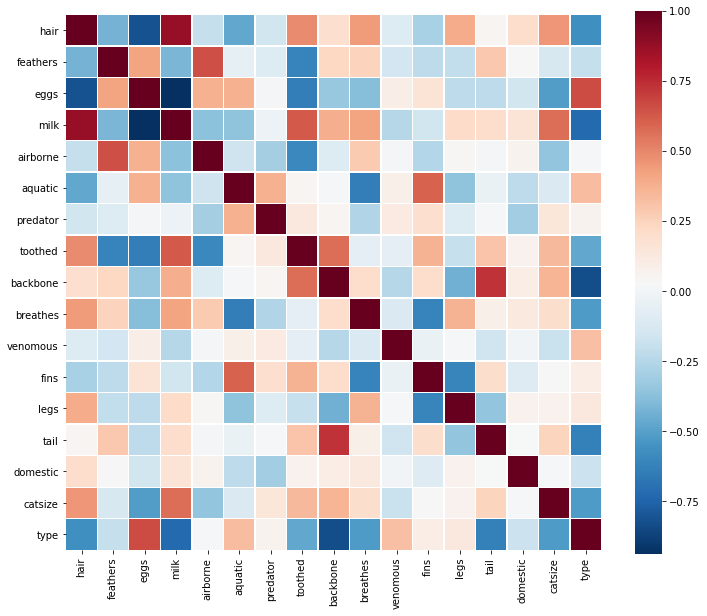

In [11]:
# Correlation
corr = zoo.corr()
fig, axs = plt.subplots(1, figsize = (12, 10))
sns.heatmap(corr, square = True, linewidths = .3, cmap = "RdBu_r")
plt.show()

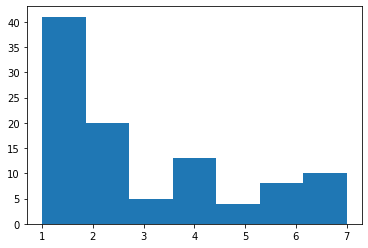

In [12]:
plt.hist(zoo.type, bins = 7)
plt.show()

In [13]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

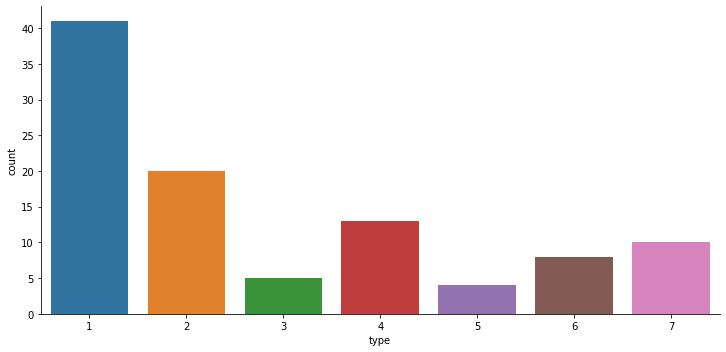

In [14]:
sns.catplot('type', data = zoo, kind = "count", height = 5, aspect = 2)

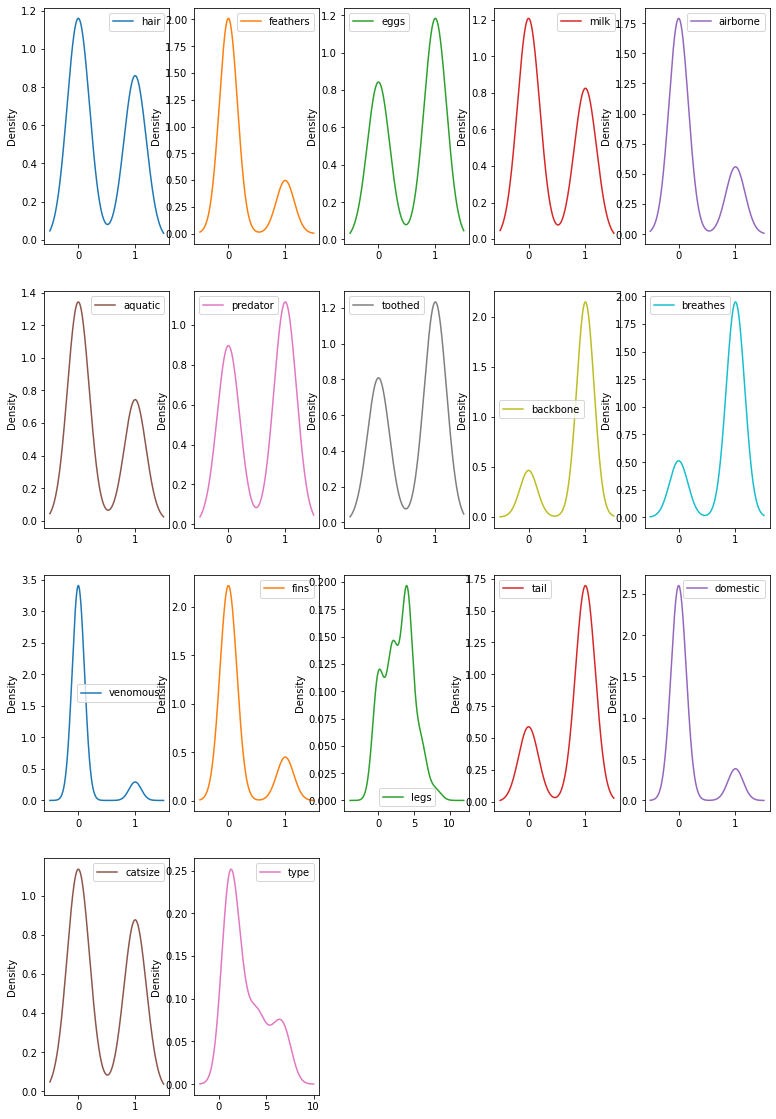

In [15]:
zoo.plot(kind = 'density', subplots = True, layout = (4, 5), figsize = (13, 20), sharex = False, sharey = False)
plt.show()

#### Split the data into Train and Test data

In [16]:
# Exclude Animal Name column for this
# Assign Type column to Y and other columns to X
X = zoo.iloc[:, 1:len(zoo.columns) - 1]
y = zoo.type

Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
Train_X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
62,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
64,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [18]:
Train_y

62    3
3     1
71    2
45    1
48    1
     ..
97    6
67    1
64    1
47    1
44    1
Name: type, Length: 80, dtype: int64

In [19]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [20]:
# K = 7 as species are 7 -> Initiating the Learning Model
knn = KNeighborsClassifier(n_neighbors = 7, leaf_size = 30)

In [21]:
knn.fit(Train_X, Train_y)

KNeighborsClassifier(n_neighbors=7)

In [22]:
# Predict the Test Set results
knn_pred = knn.predict(Test_X)

In [23]:
# Accuracy score
conf_matrix_knn = confusion_matrix(Test_y, knn_pred)
print(conf_matrix_knn)

[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [24]:
acc = accuracy_score(Test_y, knn_pred) * 100
print("Accuracy of our model = " +str(round(acc, 2)) + "%")

Accuracy of our model = 100.0%


In [25]:
# Visualization using Andrew Curves
from pandas.plotting import andrews_curves

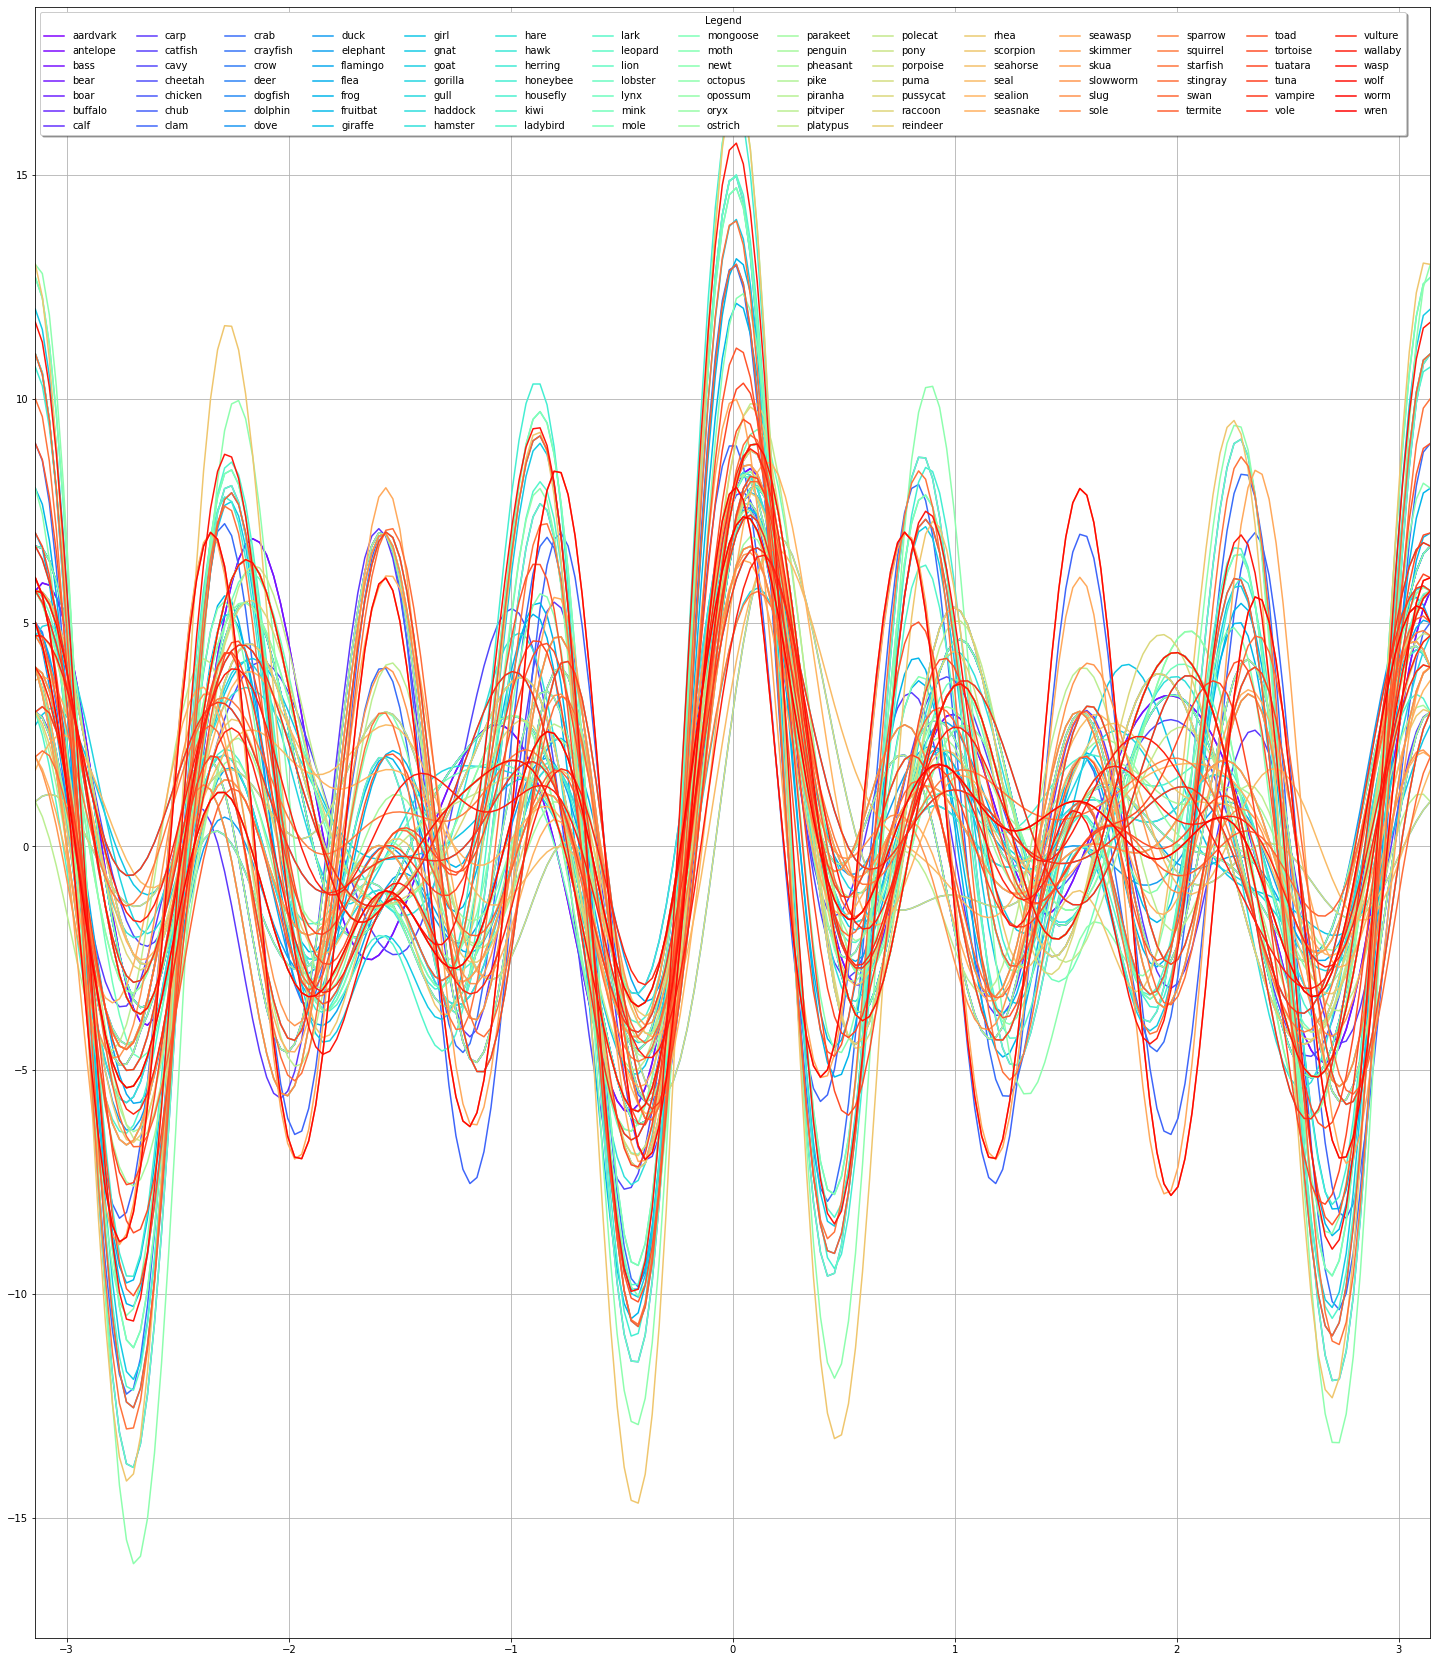

In [26]:
fig = plt.figure(figsize = (25, 30))

andrews_curves(zoo, "animal name", colormap = 'rainbow')

plt.legend(loc = "upper left", bbox_to_anchor = [0, 1], ncol = 15, shadow = True, title = "Legend", fancybox = True)

plt.show()

In [27]:
# Using Cross-Validation for parameter tuning for KNN
K_values = list(range(1, 20, 2))
K_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [28]:
# Create Cross-Validation scores
cv = []
cv_scores = []

In [29]:
# Perform 10 cross validation
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Train_X, Train_y.values)
    score = cross_val_score(knn, Train_X, Train_y, cv = 2, scoring = 'accuracy')
    cv_scores.append(score.mean())

In [30]:
# Misclassification Errors (MSE)
MSE = [1 - x for x in cv_scores]

In [31]:
MSE

[0.11250000000000004,
 0.1875,
 0.22499999999999998,
 0.23750000000000004,
 0.25,
 0.26249999999999996,
 0.4,
 0.4,
 0.4125000000000001,
 0.4125000000000001]

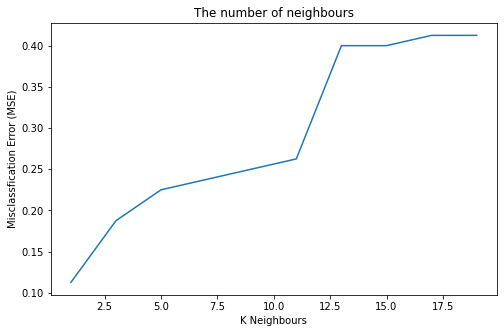

In [32]:
plt.figure(figsize = (8, 5))
plt.title("The number of neighbours")
plt.xlabel("K Neighbours")
plt.ylabel("Misclassfication Error (MSE)")
plt.plot(K_values, MSE)
plt.show()